# Lab | Avila Bible 

In this lab, we will explore the [**Avila Bible dataset**](https://archive.ics.uci.edu/ml/datasets/Avila) which has been extracted from 800 images of the 'Avila Bible', an XII century giant Latin copy of the Bible. The prediction task consists in associating each pattern to a copyist. You will use supervised learning algorithms to figure out what feature patterns each copyist are likely to have and use our model to predict those copyist.

-----------------------------------------------------------------------------------------------------------------

## Before your start:
    - Read the README.md file,
    - Comment as much as you can and use the APIla-bible in the README.md,
    - Happy learning!

In [1]:
# Import your libraries
import pandas as pd
import requests

![machine-learning](https://miro.medium.com/proxy/1*halC1X4ydv_3yHYxKqvrwg.gif)

The Avila data set has been extracted from 800 images of the the **Avila Bible**, a giant Latin copy of the whole Bible produced during the XII century between Italy and Spain. The palaeographic analysis of the  manuscript has  individuated the presence of 12 copyists. The pages written by each copyist are not equally numerous. 
Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

## What am I expected to do?

Well, your prediction task consists in associating each pattern to one of the 8 monks we will be evaluating (labeled as:  Marcus, Clarius, Philippus, Coronavirucus, Mongucus, Paithonius, Ubuntius, Esequlius). For that aim, you should: 
- Train a minimum of 4 different models
- Perform a minimum of 4 Feature Extraction and Engineering techniques
- Must contain a summary of the machine learning tools and algorithms
- and the results or the score obtained with each of them

You won't get much more instructions from now on. Remember to comment your code as much as you can. Keep the requirements in mind and have fun! 

Just one last piece of advice, take a moment to explore the data, remember this dataset contains two files: **train** and **test**. You will find both files in `data` folder. The **test** files contains the data you will predict for, therefore it does not include the labels.
Use the **train** dataset as you wish, but don't forget to split it into **train** and **test** again so you can evaluate your models. Just be sure to train it again with the whole data before predicting.
We have also included a **sample submission** which is of the exact shape and format you must use when evaluating your predictions against the groundtruth through the `APIla-bible`. It won't work unless it is the exact same shape. 



#### Train dataset

In [2]:
train_dataset = pd.read_csv('../data/training_dataset.csv', index_col=0)

In [3]:
train_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,Marcus
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,Clarius
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,Philippus
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380,Philippus
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030,Philippus


#### Test dataset


In [4]:
test_dataset = pd.read_csv('../data/test_dataset.csv', index_col=0)

In [5]:
test_dataset.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.017834,0.132725,0.125378,1.357345,0.261718,0.190314,0.182426,0.445253,-0.715453,0.189796
1,-0.202992,-0.000745,-3.210528,-0.527256,0.082961,0.771662,0.144676,0.098572,0.251173,0.745333
2,1.019049,0.211237,-0.155578,-0.311855,0.261718,0.107265,0.484429,0.339303,-0.310094,-0.049630
3,0.451232,-0.267686,0.335206,-0.831336,0.261718,0.024215,0.220177,0.988787,0.032902,0.025485
4,-0.227680,0.109171,0.413447,0.118917,0.172340,0.480988,0.522180,0.091562,0.313536,0.256389


#### Sample submission

In [6]:
sample_submission = pd.read_csv('../data/sample_submission.csv', header=None, index_col=0)

In [7]:
sample_submission.head()

,1
0,
0,Philippus
1,Ubuntius
2,Esequlius
3,Coronavirucus
4,Philippus


`Keep calm and code on!`

# Challenge - train your models, make the best prediction

In [8]:
train_dataset.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10     object
dtype: object

In [9]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics

In [10]:
X = train_dataset.drop(['10'],axis=1)

y = train_dataset['10']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = svm.SVC()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

      Clarius       0.61      0.26      0.37       481
Coronavirucus       0.99      0.96      0.97       197
    Esequlius       0.86      0.08      0.14        79
       Marcus       0.62      0.94      0.75      1021
     Mongucus       0.93      0.86      0.90       110
   Paithonius       0.86      0.39      0.53       124
    Philippus       0.74      0.67      0.70       296
     Ubuntius       0.76      0.29      0.42        96

     accuracy                           0.69      2404
    macro avg       0.80      0.56      0.60      2404
 weighted avg       0.70      0.69      0.65      2404



Text(33.0, 0.5, 'GT')

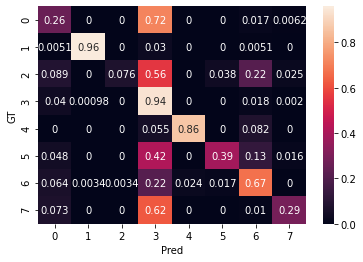

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test,y_pred, normalize="true")
sns.heatmap(cm,annot=True)
plt.xlabel("Pred")
plt.ylabel("GT")

In [12]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline

pipeline = [
    StandardScaler(),
    Normalizer(),
]

tr = make_pipeline(*pipeline)

In [13]:

X = tr.fit_transform(X)

In [14]:

df = pd.DataFrame(X)


model = LogisticRegression(solver="lbfgs")
model.fit(X,y)

y_pred = model.predict(X[:10])
pd.DataFrame({
    "gt":y[:10],
    "prediction":y_pred
})

,gt,prediction
0,Marcus,Marcus
1,Clarius,Marcus
2,Philippus,Philippus
3,Philippus,Clarius
4,Philippus,Marcus
5,Mongucus,Mongucus
6,Clarius,Clarius
7,Clarius,Marcus
8,Marcus,Marcus
9,Ubuntius,Paithonius


In [17]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
models = {
    "logis": LogisticRegression(C=10,solver="lbfgs"),
    "svm-linear": CalibratedClassifierCV(LinearSVC(),cv=3),
    "svm-rbf": CalibratedClassifierCV(SVC(kernel="poly",gamma="auto", max_iter=200),cv=3),
    "randomforest": RandomForestClassifier(n_estimators=300)
}



In [18]:
for name,m  in models.items():
    print(f"Training {name}...")
    m.fit(X_train, y_train)
print("Train complete")

Training logis...


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training svm-linear...


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Training svm-rbf...


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Training randomforest...
Train complete


In [19]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

printMetric = lambda label,value:print(f"\t {label}: {round(value,3)}")

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Evaluating model {name}")
    printMetric("Accuracy",accuracy_score(y_test, y_pred))
    printMetric("Precision",precision_score(y_test, y_pred,pos_label='positive',average='micro'))
    printMetric("Recall",recall_score(y_test, y_pred,pos_label='positive',average='micro'))
    printMetric("F1Score",f1_score(y_test, y_pred,pos_label='positive',average='micro'))

Evaluating model logis
	 Accuracy: 0.558
	 Precision: 0.558
	 Recall: 0.558
	 F1Score: 0.558
Evaluating model svm-linear
	 Accuracy: 0.527
	 Precision: 0.527
	 Recall: 0.527
	 F1Score: 0.527


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


Evaluating model svm-rbf
	 Accuracy: 0.53
	 Precision: 0.53
	 Recall: 0.53
	 F1Score: 0.53


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


Evaluating model randomforest
	 Accuracy: 0.989
	 Precision: 0.989
	 Recall: 0.989
	 F1Score: 0.989


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [20]:
from sklearn.metrics import classification_report

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"MODEL -> {name}")
    print(classification_report(y_test,y_pred))

MODEL -> logis
               precision    recall  f1-score   support

      Clarius       0.34      0.09      0.14       481
Coronavirucus       0.89      0.88      0.88       197
    Esequlius       0.00      0.00      0.00        79
       Marcus       0.53      0.93      0.68      1021
     Mongucus       0.70      0.80      0.75       110
   Paithonius       0.45      0.15      0.23       124
    Philippus       0.52      0.25      0.34       296
     Ubuntius       0.00      0.00      0.00        96

     accuracy                           0.56      2404
    macro avg       0.43      0.39      0.38      2404
 weighted avg       0.49      0.56      0.48      2404

MODEL -> svm-linear
               precision    recall  f1-score   support

      Clarius       0.15      0.03      0.05       481
Coronavirucus       0.87      0.89      0.88       197
    Esequlius       0.00      0.00      0.00        79
       Marcus       0.50      0.96      0.66      1021
     Mongucus       0.77  

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MODEL -> svm-rbf
               precision    recall  f1-score   support

      Clarius       0.20      0.00      0.00       481
Coronavirucus       0.91      0.87      0.89       197
    Esequlius       0.00      0.00      0.00        79
       Marcus       0.48      0.99      0.65      1021
     Mongucus       0.82      0.86      0.84       110
   Paithonius       0.00      0.00      0.00       124
    Philippus       0.00      0.00      0.00       296
     Ubuntius       0.00      0.00      0.00        96

     accuracy                           0.53      2404
    macro avg       0.30      0.34      0.30      2404
 weighted avg       0.36      0.53      0.39      2404



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MODEL -> randomforest
               precision    recall  f1-score   support

      Clarius       0.99      0.99      0.99       481
Coronavirucus       1.00      0.99      0.99       197
    Esequlius       0.99      0.95      0.97        79
       Marcus       0.99      1.00      0.99      1021
     Mongucus       1.00      0.97      0.99       110
   Paithonius       1.00      0.96      0.98       124
    Philippus       0.98      0.98      0.98       296
     Ubuntius       1.00      1.00      1.00        96

     accuracy                           0.99      2404
    macro avg       0.99      0.98      0.99      2404
 weighted avg       0.99      0.99      0.99      2404



In [21]:
from sklearn.model_selection import cross_val_score
import numpy as np
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10)
    print(f"({name}) acccuracy={np.mean(scores)}")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

(logis) acccuracy=0.5844216065092734
(svm-linear) acccuracy=0.575017283156992


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


KeyboardInterrupt: 

In [23]:
prediction =  RandomForestClassifier(n_estimators=300)
                       

## What do I do once I have a prediction?

Once you have already trained your model and made a prediction with it, you are ready to check what is the accuracy of it. 

Save your prediction as a `.csv` file.

In [25]:
import pandas as pd
prediction = pd.DataFrame(train_dataset, columns=['predictions']).to_csv('prediction.csv')
prediction
# mejor predict randomforest

Now you are ready to know the truth! Are you good enough to call yourself a pro?

Lucky you have the ultimate **APIla-bible** which give you the chance of checking the accuracy of your predictions as many times as you need in order to become the pro you want to be. 

## How do I post my prediction to the APIla-bible?

Easy peasy! You should only fulfil the path to your prediction `.csv` and run the cell below! 

In [26]:
my_submission = "../prediction.csv"
with open(my_submission) as f:
    res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":f.read()})
res.json()

FileNotFoundError: [Errno 2] No such file or directory: '../prediction.csv'

![hope-you-enjoy](https://imgs.xkcd.com/comics/machine_learning.png)